<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

# 소매점 판매 현황

<img src='https://raw.githubusercontent.com/Jangrae/img/master/retail.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [1]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 customers, products, orders 데이터프레임을 만듭니다.
- 파일 경로1: 'https://raw.githubusercontent.com/Jangrae/csv/master/customers.csv'    
- 파일 경로2: 'https://raw.githubusercontent.com/Jangrae/csv/master/products.csv'
- 파일 경로3: 'https://raw.githubusercontent.com/Jangrae/csv/master/orders.csv'
- 단축 경로1: 'https://bit.ly/CustomersFile'    
- 단축 경로2: 'https://bit.ly/ProductsFile'  
- 단축 경로3: 'https://bit.ly/OrdersFile'  

In [10]:
path1 = 'https://bit.ly/CustomersFile'
customers = pd.read_csv(path1)
customers.head()

,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
0,c017487,2002-07-31,경기 성남시 중원구 둔촌대로190번길,F,1968,경기도,성남시
1,c017503,2002-07-31,서울 마포구 새터산12길,F,1971,서울특별시,마포구
2,c017517,2002-07-31,경기도 남양주시 와부읍 덕소로,M,1967,경기도,남양주시
3,c017522,2002-07-31,강원도 원주시 단구로,F,1965,강원도,원주시
4,c017526,2002-07-31,경기도 부천시 오정구 소사로730번길,F,1960,경기도,부천시


In [11]:
path2 = 'https://bit.ly/ProductsFile'
products = pd.read_csv(path2)
products.head()

,ProductID,ProductName,Category,SubCategory,CategoryOrd
0,p1001771,마늘,채소,뿌리채소,5
1,p1002841,딸기_대,과일,과채,2
2,p1005621,숙주나물,반찬류,나물류,1
3,p1005771,두부_소,반찬류,두부,1
4,p1005891,두부_대,반찬류,두부,1


In [12]:
path3 = 'https://bit.ly/OrdersFile'
orders = pd.read_csv(path3)
orders.head()

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
0,1,1,2016-01-02,p1030071,2,7900,c107853
1,2,1,2016-01-02,p1012761,1,1700,c110521
2,2,2,2016-01-02,p1012581,1,1000,c110521
3,2,3,2016-01-02,p1175481,1,1300,c110521
4,2,4,2016-01-02,p1178011,1,8800,c110521


## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 고객 정보(customers)**  4개이상

- customers 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.
- 우선 기초적인 탐색을 통해 데이터를 알아본 후 지역별, 나이별, 성별 고객의 수를 조사하였습니다.

In [14]:
#하위 10개 확인
customers.tail(10)


,CustomerID,RegisterDate,Address,Gender,BirthYear,Addr1,Addr2
2233,c400312,2017-03-03,인천 동구 송미로,F,1975,인천광역시,동구
2234,c400470,2017-03-06,경기도 용인시 수지구 수풍로,F,1979,경기도,용인시
2235,c400665,2017-03-08,인천광역시 계양구 장제로,F,1964,인천광역시,계양구
2236,c400706,2017-03-09,서울 마포구 백범로,F,1981,서울특별시,마포구
2237,c400735,2017-03-09,경기도 남양주시 와부읍 덕소로,F,1970,경기도,남양주시
2238,c400937,2017-03-12,인천광역시 계양구 주부토로,F,1980,인천광역시,계양구
2239,c401555,2017-03-20,경기도 남양주시 별내면 청학로68번길,F,1981,경기도,남양주시
2240,c401584,2017-03-20,경기도 성남시 분당구 불정로,F,1979,경기도,성남시
2241,c402010,2017-03-25,경기도 성남시 분당구 판교원로82번길,F,1969,경기도,성남시
2242,c402634,2017-03-30,경기도 용인시 수지구 죽전로,F,1960,경기도,용인시


In [15]:
#열 정보 확인
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    2243 non-null   object
 1   RegisterDate  2243 non-null   object
 2   Address       2243 non-null   object
 3   Gender        2243 non-null   object
 4   BirthYear     2243 non-null   int64 
 5   Addr1         2243 non-null   object
 6   Addr2         2243 non-null   object
dtypes: int64(1), object(6)
memory usage: 122.8+ KB


In [17]:
#결측치 확인
customers.isna().sum()


CustomerID      0
RegisterDate    0
Address         0
Gender          0
BirthYear       0
Addr1           0
Addr2           0
dtype: int64

In [18]:
#value count - 지역
customers['Addr1'].value_counts()


경기도      1260
서울특별시     564
인천광역시     325
강원도        62
대구광역시       8
충청북도        8
충청남도        6
전라남도        3
광주광역시       3
경상북도        2
경상남도        1
전라북도        1
Name: Addr1, dtype: int64

In [19]:
#value count - 성별
customers['Gender'].value_counts()


F    2060
M     183
Name: Gender, dtype: int64

In [20]:
#value count - 나이
customers['BirthYear'].value_counts()


1973    122
1971    116
1974    107
1979    105
1970    104
       ... 
1939      2
1936      1
1994      1
1995      1
1999      1
Name: BirthYear, Length: 62, dtype: int64

- 탐색 결과
    - 데이터는 날짜순 저장, 결측치는 없었다.
    - 서울, 경기, 인천에 사는 고객이 대부분의 비중을 차지하였다.
    - 여성 고객이 대부분이었다. -> 사용금액에서도 차이가 있는지 알아볼 예정이다.
    - 나이가 작아질수록 고객이 적어지는 경향이보인다. -> 나이 컬럼을 추가해 20대, 30대...로 그룹화하여 알아볼 예정이다.



**2) 상품 정보(products)**

- products 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [21]:
#하위 10개 확인
products.tail(10)


,ProductID,ProductName,Category,SubCategory,CategoryOrd
52,p1231011,초코아이스크림,유제품,아이스크림,4
53,p1233511,피망,채소,뿌리채소,5
54,p1234751,초코콘,유제품,아이스크림,4
55,p1235451,콘칩,간식,과자,3
56,p1237811,사과_대,과일,과수,2
57,p1246581,초코우유,유제품,우유,4
58,p1255281,딸기요거트,유제품,요거트,4
59,p1256521,부침용두부,반찬류,두부,1
60,p1284851,유기농우유,유제품,우유,4
61,p1299491,당근,채소,뿌리채소,5


In [22]:
#열 정보 확인
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    62 non-null     object
 1   ProductName  62 non-null     object
 2   Category     62 non-null     object
 3   SubCategory  62 non-null     object
 4   CategoryOrd  62 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 2.5+ KB


In [23]:
#결측치 확인
products.isna().sum()


ProductID      0
ProductName    0
Category       0
SubCategory    0
CategoryOrd    0
dtype: int64

In [27]:
#value count - 카테고리
products['Category'].value_counts()


채소     23
유제품    14
간식     11
반찬류     8
과일      6
Name: Category, dtype: int64

In [28]:
#value count - 서브카테고리
products['SubCategory'].value_counts()



뿌리채소     9
잎채소      8
아이스크림    7
두부       6
과자       6
우유       5
열매채소     4
과채       4
사탕류      3
나물류      2
빵        2
버섯       2
요거트      2
과수       2
Name: SubCategory, dtype: int64

In [29]:
#value count - 상품이름
products['ProductName'].value_counts()


당근         3
감자칩        2
브로컬리       1
깻잎         1
백오이        1
청오이        1
초코아이스크림    1
유부         1
딸기아이스크림    1
팽이버섯       1
짱구         1
사과아이스크림    1
포도컵푸딩      1
애호박        1
숙주나물       1
양파         1
쌈모음        1
부추         1
배아이스크림     1
저지방우유      1
통단팥빵       1
사과_대       1
파          1
무농약시금치     1
딸기_소       1
초코콘        1
상추         1
마늘         1
유기농우유      1
무          1
팥아이스크림     1
소보루빵       1
사과_소       1
콘칩         1
순두부        1
양배출        1
열무         1
부침용두부      1
뿌셔뿌셔       1
플레인요거트     1
고구마스틱      1
느타리버섯      1
피망         1
우유200      1
연두부        1
토마토        1
두부_소       1
우유1000     1
참외         1
딸기요거트      1
콩나물        1
낱개캔디       1
딸기_대       1
시금치        1
두부_대       1
감귤컵푸딩      1
포토아이스크림    1
초코우유       1
새우깡        1
Name: ProductName, dtype: int64

- 탐색 결과
    - 데이터의 결측치는 존재하지 않았습니다.
    - 상품의 종류는 총 62개이고 큰 카테고리는 5개입니다.
    - 날짜별, 성별, 지역별 등등 기준으로 가장 많이 주문된 카테고리, 서브카테고리 등을 조사할 수 있습니다.


**3) 주문 정보(orders)**

- orders 데이터프레임을 충분히 탐색합니다.
- 간단한 집계를 수행해 보는 것도 좋은 방법입니다.

In [30]:
#하위 10개 확인
orders.tail(10)


,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
68829,74,2,2017-03-31,p1175481,1,1300,c221180
68830,74,3,2017-03-31,p1201601,1,2100,c221180
68831,75,1,2017-03-31,p1097821,1,1000,c255098
68832,75,2,2017-03-31,p1119071,1,1091,c255098
68833,75,3,2017-03-31,p1201601,1,2100,c255098
68834,76,1,2017-03-31,p1201601,1,2100,c302834
68835,77,1,2017-03-31,p1002841,1,10700,c343734
68836,78,1,2017-03-31,p1012761,1,1900,c354639
68837,79,1,2017-03-31,p1005891,1,1950,c394131
68838,79,2,2017-03-31,p1179241,1,2200,c394131


In [31]:
#열 정보 확인
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68839 entries, 0 to 68838
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   OrderID     68839 non-null  int64 
 1   Seq         68839 non-null  int64 
 2   OrderDate   68839 non-null  object
 3   ProductID   68839 non-null  object
 4   Qty         68839 non-null  int64 
 5   Amt         68839 non-null  int64 
 6   CustomerID  68839 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.7+ MB


In [32]:
#결측치 확인
orders.isna().sum()


OrderID       0
Seq           0
OrderDate     0
ProductID     0
Qty           0
Amt           0
CustomerID    0
dtype: int64

In [33]:
#value count - 주문 횟수
orders['Qty'].value_counts()


1      57483
2       8292
3       1683
4        697
5        321
6        144
10        71
8         51
7         48
9         14
12        10
16         4
60         4
15         2
100        2
50         2
200        1
72         1
70         1
14         1
18         1
19         1
20         1
21         1
22         1
25         1
30         1
Name: Qty, dtype: int64

In [34]:
#동시 20회 이상 주문하는 물품 확인
orders[orders['Qty']>=20]


,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID
9074,17,1,2016-03-03,p1011291,22,5676,c043687
11668,40,1,2016-03-18,p1246581,25,28400,c276910
17614,38,2,2016-04-23,p1011291,60,16380,c334413
17880,19,1,2016-04-25,p1011291,30,8190,c193651
18683,56,1,2016-04-29,p1011291,50,13650,c317556
19382,63,1,2016-05-03,p1011291,50,13650,c366888
25194,34,1,2016-06-07,p1011291,70,18550,c311943
41725,55,1,2016-09-24,p1011291,200,51600,c043687
41950,15,1,2016-09-26,p1006281,100,86400,c352349
41951,15,2,2016-09-26,p1006411,100,109100,c352349


In [36]:
#value count - 동시 주문 횟수
orders['Seq'].value_counts()


1     32451
2     17633
3      9163
4      4724
5      2459
6      1199
7       587
8       298
9       151
10       77
11       47
12       27
13       13
14        7
15        3
Name: Seq, dtype: int64

- 탐색 결과
    - 결측치는 없었습니다.
    - 나이별, 월별, 가격별 주문 현황을 분석하기 위해서는 세가지 데이터 프레임의 적절한 merge가 필요하다고 생각되었습니다.



## 3.데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 데이터 통합**   --> sales 데이터프레임

- 각 데이터프레임의 모든 열을 통합 할 것이 아니면 
    - 필요한 열만 추출해 별도 데이터프레임을 선언한 후 통합하거나
    - 또는 모두 통합 후 불필요한 열을 제거하는 방법을 사용합니다.
    
- 통합 방안
    - 3가지를 모두 통합합니다.
    - 분석에 불필요하다고 판단되는 RegisterDate, Address, CategoryOrd를 제거합니다.
    - 결측치는 아이디는 있지만 주문을 하지 않은 사람이므로 Inner로 merge해 없애주었습니다.

In [77]:
sales = pd.merge(orders,products,how='inner')
sales = pd.merge(sales,customers,how='inner')
xcol = ['RegisterDate', 'Address', 'CategoryOrd']
sales.drop(xcol, axis=1, inplace=True)

**2) 결과 확인**

In [81]:
sales.head(10)

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,ProductName,Category,SubCategory,Gender,BirthYear,Addr1,Addr2,Age,OrderYear,OrderMonth,Agrp,Price
0,1,1,2016-01-02,p1030071,2,7900,c107853,토마토,과일,과채,M,1961,경기도,안성시,56,2016,01,50,3950
1,55,1,2016-07-26,p1012581,1,1050,c107853,깻잎,채소,잎채소,M,1961,경기도,안성시,56,2016,07,50,1050
2,44,8,2016-09-19,p1012581,1,1050,c107853,깻잎,채소,잎채소,M,1961,경기도,안성시,56,2016,09,50,1050
3,36,2,2016-01-29,p1175481,1,1200,c107853,콩나물,반찬류,나물류,M,1961,경기도,안성시,56,2016,01,50,1200
4,54,1,2016-03-15,p1175481,1,1300,c107853,콩나물,반찬류,나물류,M,1961,경기도,안성시,56,2016,03,50,1300
5,50,1,2016-09-13,p1175481,1,1150,c107853,콩나물,반찬류,나물류,M,1961,경기도,안성시,56,2016,09,50,1150
6,44,6,2016-09-19,p1175481,1,1300,c107853,콩나물,반찬류,나물류,M,1961,경기도,안성시,56,2016,09,50,1300
7,35,4,2016-09-29,p1175481,2,2600,c107853,콩나물,반찬류,나물류,M,1961,경기도,안성시,56,2016,09,50,1300
8,4,5,2016-10-17,p1175481,2,2600,c107853,콩나물,반찬류,나물류,M,1961,경기도,안성시,56,2016,10,50,1300
9,44,2,2016-11-14,p1175481,2,2600,c107853,콩나물,반찬류,나물류,M,1961,경기도,안성시,56,2016,11,50,1300


**3) 열 추가**

- 분석을 위해 필요한 열을 추가합니다.
- 예를 들어 다음과 같은 열들이 필요하다고 판단할 수 있습니다.
    - OrderYear: 주문연도, 주문연도별 분석이 용이하게 하기 위함
    - OrderMonth: 주문월, 주문년월 분석이 용이하게 하기 위함
    - Age: 연령별 분석을 하기 위함(2017 - 출생년도)
    - Agrp : 연령대별 분석을 위해 필요
    - Price : 1개당 가격으로 가격에 따른 구매 영향을 조사하기 위함

In [79]:
sales['Age'] = 2017-sales['BirthYear']
sales['OrderYear'] = sales['OrderDate'].str.split('-').str[0]
sales['OrderMonth'] = sales['OrderDate'].str.split('-').str[1]
sales['Agrp'] = sales['Age']//10*10
sales['Price'] = (sales['Amt']/sales['Qty']).astype(int)
sales.head(10)

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,ProductName,Category,SubCategory,Gender,BirthYear,Addr1,Addr2,Age,OrderYear,OrderMonth,Agrp,Price
0,1,1,2016-01-02,p1030071,2,7900,c107853,토마토,과일,과채,M,1961,경기도,안성시,56,2016,01,50,3950
1,55,1,2016-07-26,p1012581,1,1050,c107853,깻잎,채소,잎채소,M,1961,경기도,안성시,56,2016,07,50,1050
2,44,8,2016-09-19,p1012581,1,1050,c107853,깻잎,채소,잎채소,M,1961,경기도,안성시,56,2016,09,50,1050
3,36,2,2016-01-29,p1175481,1,1200,c107853,콩나물,반찬류,나물류,M,1961,경기도,안성시,56,2016,01,50,1200
4,54,1,2016-03-15,p1175481,1,1300,c107853,콩나물,반찬류,나물류,M,1961,경기도,안성시,56,2016,03,50,1300
5,50,1,2016-09-13,p1175481,1,1150,c107853,콩나물,반찬류,나물류,M,1961,경기도,안성시,56,2016,09,50,1150
6,44,6,2016-09-19,p1175481,1,1300,c107853,콩나물,반찬류,나물류,M,1961,경기도,안성시,56,2016,09,50,1300
7,35,4,2016-09-29,p1175481,2,2600,c107853,콩나물,반찬류,나물류,M,1961,경기도,안성시,56,2016,09,50,1300
8,4,5,2016-10-17,p1175481,2,2600,c107853,콩나물,반찬류,나물류,M,1961,경기도,안성시,56,2016,10,50,1300
9,44,2,2016-11-14,p1175481,2,2600,c107853,콩나물,반찬류,나물류,M,1961,경기도,안성시,56,2016,11,50,1300


**4) 불필요한 열 제거**

- 분석에 필요가 없다고 생각되는 열은 제거합니다.
- 새로운 열을 추가하면 기존 열이 필요하지 않을 수 있습니다.
- 예를 들어 다음 열들이 필요하지 않다고 판단할 수 있습니다.
    - OrderDate: 새로 추가한 OrderYear, OrderMonth 열 사용
    - ProductID: ProductName 열 사용
    - SubCategory: 분석 대상에서 제외
    - BirthYear : Agrp 열로 대체

In [125]:
xcol2 = ['OrderDate','ProductID','SubCategory','BirthYear']
sales.drop(xcol2, axis=1, inplace=True)


## 4.데이터 분석

- 현재 판매 현황을 분석해 향후 판매 전략 수립에 중요한 정보로 활용할 것입니다.
- 데이터를 집계하고 간단히 시각화하여 판매 현황을 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 남녀별 판매 현황**

- 남녀별 판매 현황을 막대 그래프로 시각화해 확인합니다.

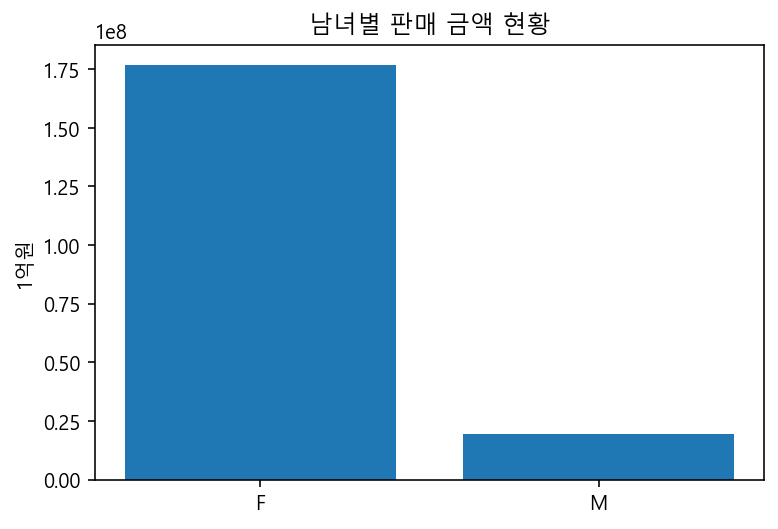

In [126]:
tmp1 = sales.groupby(by='Gender',as_index=False)['Amt'].sum()
import matplotlib.pyplot as plt
plt.bar(tmp1['Gender'],tmp1['Amt'])
plt.ylabel("1억원")
plt.title('남녀별 판매 금액 현황')
plt.show()

**2) 지역별 판매 현황**

- 지역별 판매 현황을 막대 그래프로 시각화해 확인합니다.

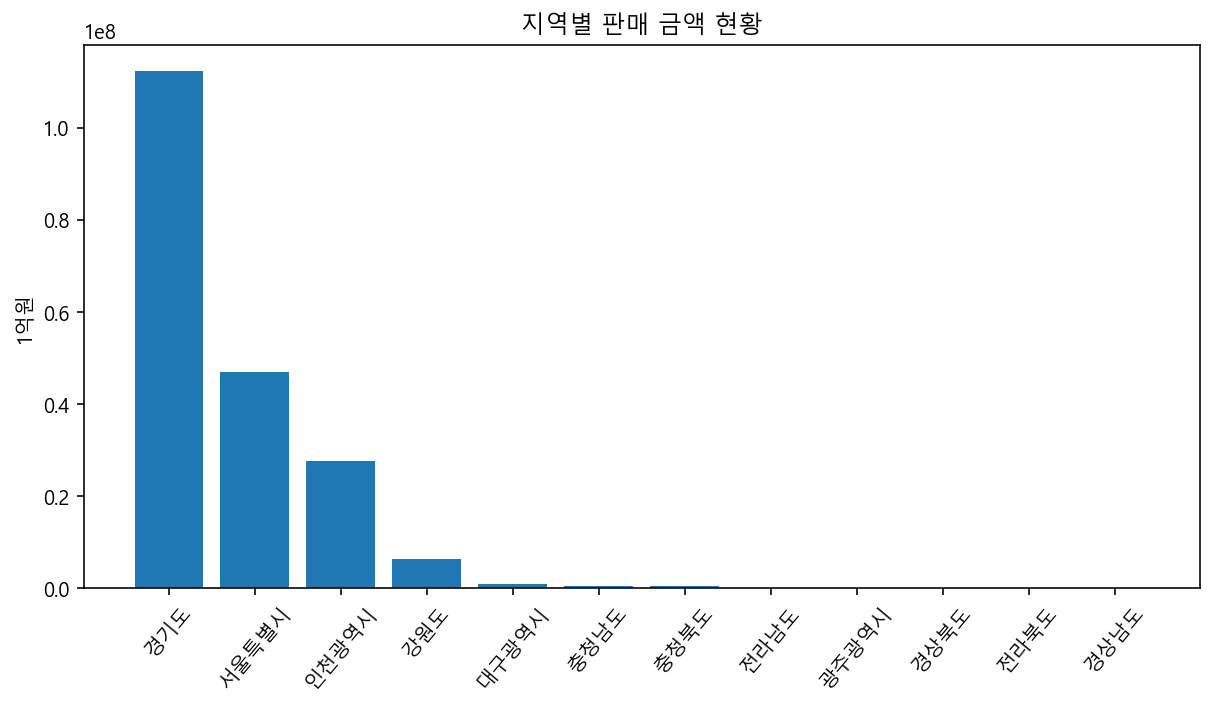

In [127]:
tmp2 = sales.groupby(by='Addr1',as_index=False)['Amt'].sum()
tmp2.sort_values(by='Amt',ascending=False,inplace=True)
plt.figure(figsize=(10, 5))
plt.bar(tmp2['Addr1'],tmp2['Amt'])
plt.xticks(rotation=50)
plt.ylabel("1억원")
plt.title('지역별 판매 금액 현황')
plt.show()



**3) 나이별 구매력 차이 조사**

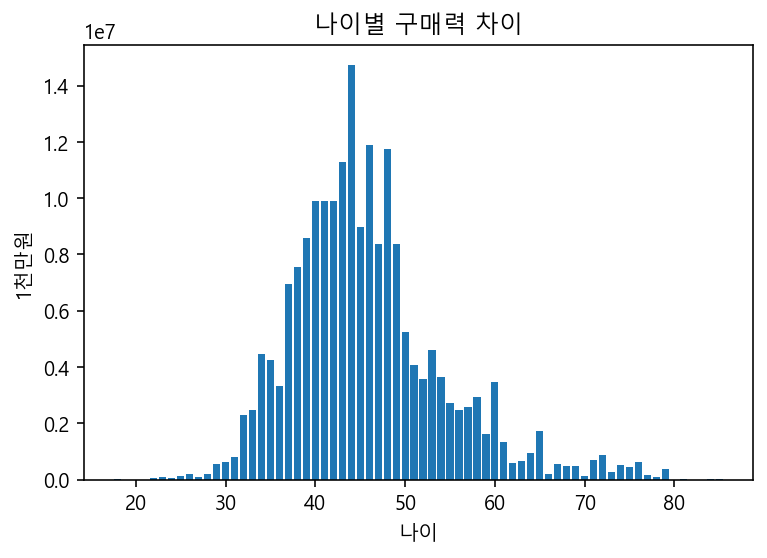

In [128]:
tmp3 = sales.groupby(by='Age',as_index=False)['Amt'].sum()
tmp3.sort_values(by='Amt',ascending=False,inplace=True)
plt.bar(tmp3['Age'],tmp3['Amt'])
plt.xlabel("나이")
plt.ylabel("1천만원")
plt.title('나이별 구매력 차이')
plt.show()

**4) 월별 구매력 차이 조사**

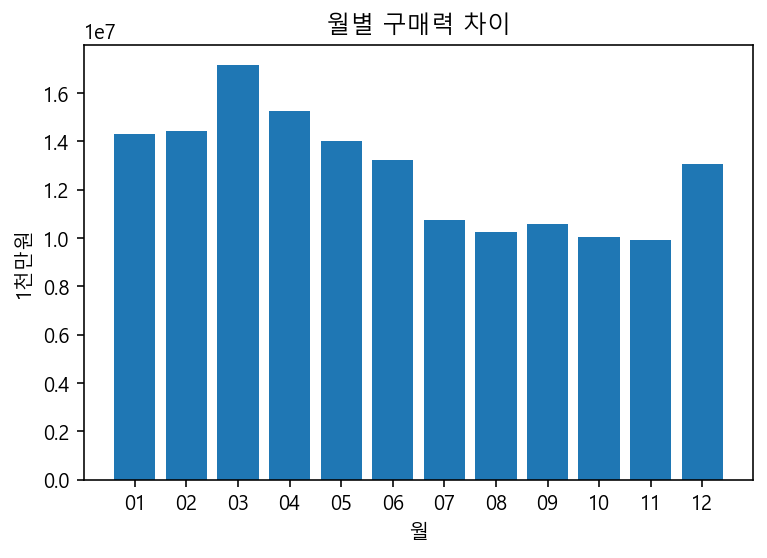

In [150]:
#그냥 Sales로 groupby할 경우 2017년도 포함되어 123월이 너무 커지게됨.
tmp4 = sales[sales['OrderYear']=='2016'].groupby(by=['OrderMonth'],as_index=False)[['Amt']].sum()
plt.bar(tmp4['OrderMonth'],tmp4['Amt'])
plt.xlabel("월")
plt.ylabel("1천만원")
plt.title('월별 구매력 차이')
plt.show()


**5) 카테고리 별 구매 정도 차이**

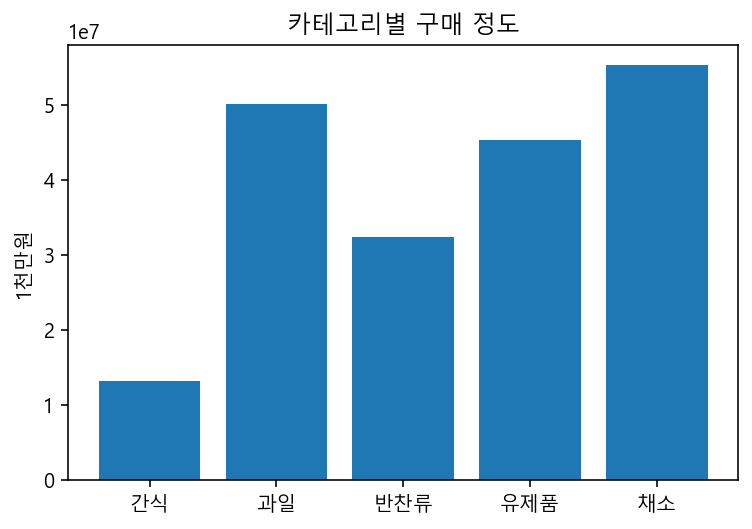

In [154]:
tmp5 = sales.groupby(by='Category',as_index=False)['Amt'].sum()
plt.bar(tmp5['Category'],tmp5['Amt'])
plt.ylabel("1천만원")
plt.title('카테고리별 구매 정도')
plt.show()

## 5.고객 분류

* 고객을 등급을 나눠 판매 현황을 분석하고 이에 따른 판매 전략을 수립하려합니다.
- 우선 고객을 일정 기준에 따라 분류하고 등급을 지정해야 합니다.
- 다음과 같은 순서로 처리하면 될 것입니다.
    - 고객별 주문 수량 합, 판매 금액 합을 갖는 데이터프레임 선언
    - 고객 분류 기준과 이 기준에 따른 등급 이름 정의
    - 고객 등급을 갖는 새로운 Level 열 추가

**1) 고객별 집계**

* 고객별 주문 수량 합, 판매 금액 합을 갖는 cst 데이터프레임을 선언합니다.
* num = 1을 추가하여 이를 더해 고객당 주문 횟수 또한 확인합니다.

In [157]:
sales['num'] = 1
sales.head()

,OrderID,Seq,Qty,Amt,CustomerID,ProductName,Category,Gender,Addr1,Addr2,Age,OrderYear,OrderMonth,Agrp,Price,num
0,1,1,2,7900,c107853,토마토,과일,M,경기도,안성시,56,2016,01,50,3950,1
1,55,1,1,1050,c107853,깻잎,채소,M,경기도,안성시,56,2016,07,50,1050,1
2,44,8,1,1050,c107853,깻잎,채소,M,경기도,안성시,56,2016,09,50,1050,1
3,36,2,1,1200,c107853,콩나물,반찬류,M,경기도,안성시,56,2016,01,50,1200,1
4,54,1,1,1300,c107853,콩나물,반찬류,M,경기도,안성시,56,2016,03,50,1300,1


In [234]:
cst = sales.groupby(by=['CustomerID',"Addr1"],as_index=False)[['Qty','Amt','num']].sum()
cst.head()



,CustomerID,Addr1,Qty,Amt,num
0,c017487,경기도,127,296447,90
1,c017503,서울특별시,42,160444,37
2,c017517,경기도,192,317590,124
3,c017522,강원도,64,219849,61
4,c017526,경기도,26,48881,21


**2) 고객 분류 기준 찾기**

- 고객 등급 분류 기준을 찾기 위해 관련 데이터를 확인합니다.

In [235]:
a1 = cst.describe().loc['25%','Amt']
a2 = cst.describe().loc['50%','Amt']
a3 = cst.describe().loc['75%','Amt']
q1 = cst.describe().loc['25%','Qty']
q2 = cst.describe().loc['50%','Qty']
q3 = cst.describe().loc['75%','Qty']
n1 = cst.describe().loc['25%','num']
n2 = cst.describe().loc['50%','num']
n3 = cst.describe().loc['75%','num']
import numpy as np
bina = [-np.inf,a1,a2,a3,np.inf]
binq = [-np.inf,q1,q2,q3,np.inf]
binn = [-np.inf,n1,n2,n3,np.inf]
label = [1,2,3,4]
cst['Qty_grp'] = pd.cut(cst['Qty'], bins=binq, labels=label) 
cst['Amt_grp'] = pd.cut(cst['Amt'], bins=bina, labels=label)
cst['num_grp'] = pd.cut(cst['num'], bins=binn, labels=label)
cst['score'] = cst['Qty_grp'].astype(int)+cst['Amt_grp'].astype(int)+cst['num_grp'].astype(int)
cst['score'].value_counts()

12    486
3     470
9     410
6     323
4     158
5      95
7      83
8      75
11     69
10     68
Name: score, dtype: int64

In [237]:
import numpy as np
bina = [-np.inf,a1,a2,a3,np.inf]
binq = [-np.inf,q1,q2,q3,np.inf]
binn = [-np.inf,n1,n2,n3,np.inf]
label = [1,2,3,4]
cst['Qty_grp'] = pd.cut(cst['Qty'], bins=binq, labels=label) 
cst['Amt_grp'] = pd.cut(cst['Amt'], bins=bina, labels=label)
cst['num_grp'] = pd.cut(cst['num'], bins=binn, labels=label)
cst

,CustomerID,Addr1,Qty,Amt,num,Qty_grp,Amt_grp,num_grp,score
0,c017487,경기도,127,296447,90,4,4,4,12
1,c017503,서울특별시,42,160444,37,3,4,3,10
2,c017517,경기도,192,317590,124,4,4,4,12
3,c017522,강원도,64,219849,61,4,4,4,12
4,c017526,경기도,26,48881,21,3,3,3,9
...,...,...,...,...,...,...,...,...,...
2232,c400937,인천광역시,1,1650,1,1,1,1,3
2233,c401555,경기도,3,11940,3,1,2,1,4
2234,c401584,경기도,2,6509,2,1,1,1,3
2235,c402010,경기도,5,20650,3,2,2,1,5


**3) 고객 분류 기준 정리**

- 고객 등급 분류 기준과 그 기준에 따른 등급 이름을 정리합니다.
- 예를 들면 다음과 같은 기준과 등급 이름을 정의할 수 있을 것입니다.
    - ~ 30,000: Family
    - 30,000 ~ 100,000: Bronze
    - 100,000 ~ 300,000: Silver
    - 300,000 ~ : Gold
    - 600,000 ~ : Platinum
- 분류 기준과 등급 이름
    -  고객별 구매 횟수, 방문 횟수, 사용 총액 계산하여 25% 50% 75%로 구분해 score로 제시
    -  12점 : S+
    -  ~ 10점 : S
    -  ~ 6점 : A
    -  ~ 3점 : B

**4) 고객 등급 반영**

- 각자 정의한 기준에 따라 고객 등급을 Level 열로 저장합니다.

In [238]:
cst.loc[cst['score'] == 12, 'Level'] = 'S+'
cst.loc[(cst['score'] < 12) & (cst['score'] >= 10), 'Level'] = 'S'
cst.loc[(cst['score'] < 10) & (cst['score'] >= 6), 'Level'] = 'A'
cst.loc[(cst['score'] < 6) & (cst['score'] >= 3), 'Level'] = 'B'
cst

,CustomerID,Addr1,Qty,Amt,num,Qty_grp,Amt_grp,num_grp,score,Level
0,c017487,경기도,127,296447,90,4,4,4,12,S+
1,c017503,서울특별시,42,160444,37,3,4,3,10,S
2,c017517,경기도,192,317590,124,4,4,4,12,S+
3,c017522,강원도,64,219849,61,4,4,4,12,S+
4,c017526,경기도,26,48881,21,3,3,3,9,A
...,...,...,...,...,...,...,...,...,...,...
2232,c400937,인천광역시,1,1650,1,1,1,1,3,B
2233,c401555,경기도,3,11940,3,1,2,1,4,B
2234,c401584,경기도,2,6509,2,1,1,1,3,B
2235,c402010,경기도,5,20650,3,2,2,1,5,B


- 등급별 고객 수를 확인해 등급이 적절히 나뉘었는지 검증합니다.
- 검증 결과가 적절하지 않다면 위 기준을 변경해 등급을 다시 나눕니다.

In [239]:
cst['Level'].value_counts()
l = [891,723,486,137]


## 6.등급별 고객 분석

- 고객 등급을 기준으로 다양한 분석을 진행합니다.
- 등급 별 분석은 판매 전략을 새롭게 수립하는 데 중요한 자료가 될 것입니다.
- 분석 과정에서 판매 전략에 대한 부분을 고민해 보시기 바랍니다.

**1) 등급별 판매 수량 / 1인당 등급별 판매 수량**

- 고객 등급별 판매 수량을 막대 그래프로 시각화해 확인합니다.

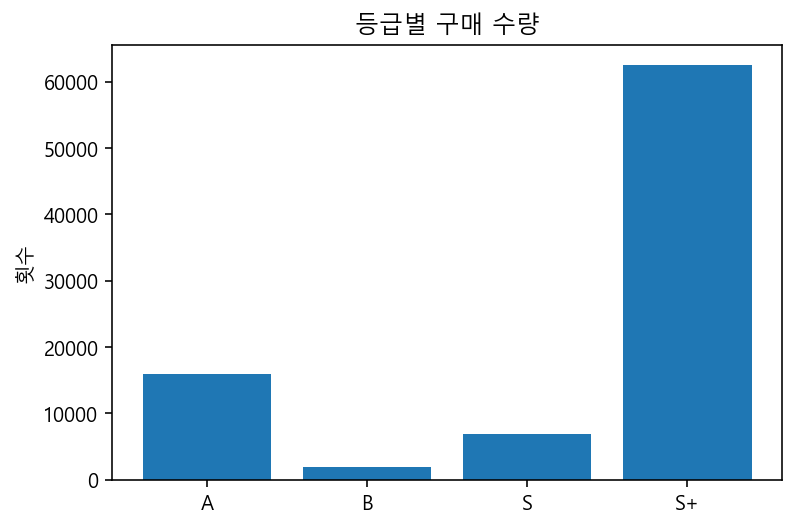

In [240]:
tmp1 = cst.groupby(by='Level',as_index=False)['Qty'].sum()
plt.bar(tmp1['Level'],tmp1['Qty'])
plt.ylabel("횟수")
plt.title('등급별 구매 수량')
plt.show()

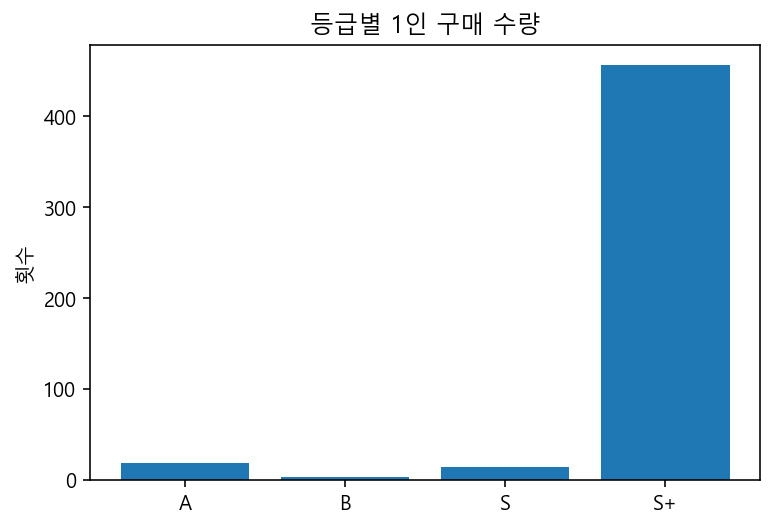

In [241]:
plt.bar(tmp1['Level'],tmp1['Qty']/l)
plt.ylabel("횟수")
plt.title('등급별 1인 구매 수량')
plt.show()

**2) 등급별 판매 금액**

- 고객 등급별 판매 금액을 막대 그래프로 시각화해 확인합니다. 

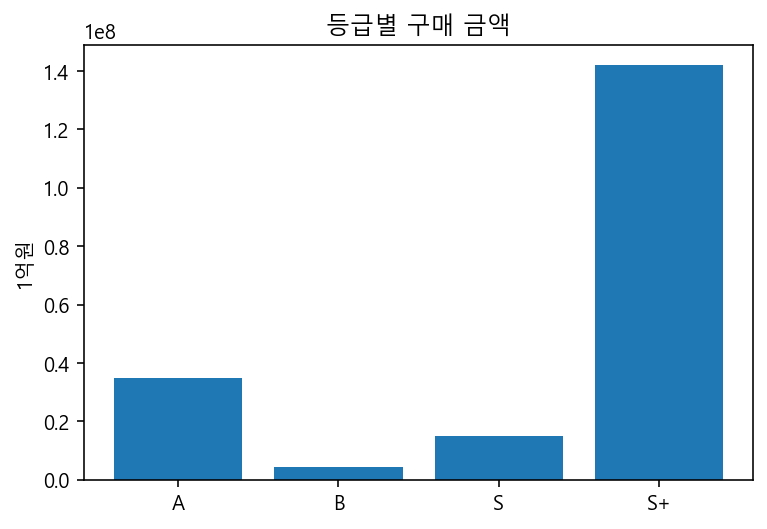

In [242]:
tmp2 = cst.groupby(by='Level',as_index=False)['Amt'].sum()
plt.bar(tmp2['Level'],tmp2['Amt'])
plt.ylabel("1억원")
plt.title('등급별 구매 금액')
plt.show()



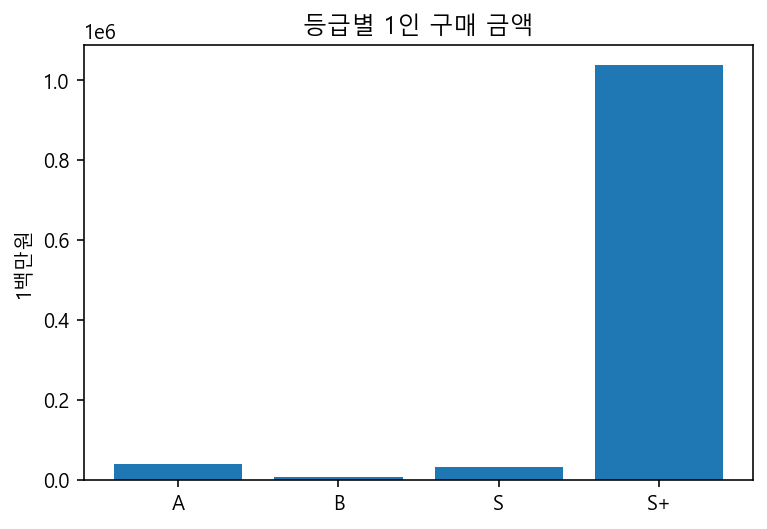

In [243]:
plt.bar(tmp2['Level'],tmp2['Amt']/l)
plt.ylabel("1백만원")
plt.title('등급별 1인 구매 금액')
plt.show()

**3) 등급 별 방문 횟수 조사**

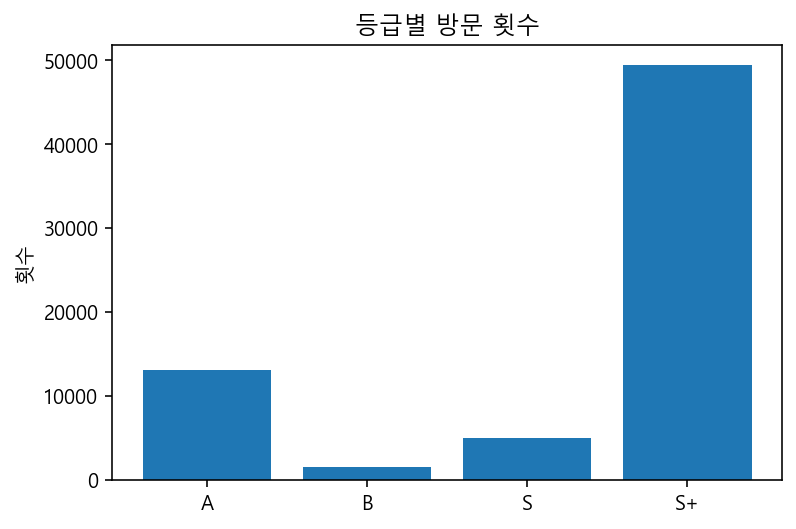

In [244]:
tmp3 = cst.groupby(by='Level',as_index=False)['num'].sum()
plt.bar(tmp3['Level'],tmp3['num'])
plt.ylabel("횟수")
plt.title('등급별 방문 횟수')
plt.show()
 
 

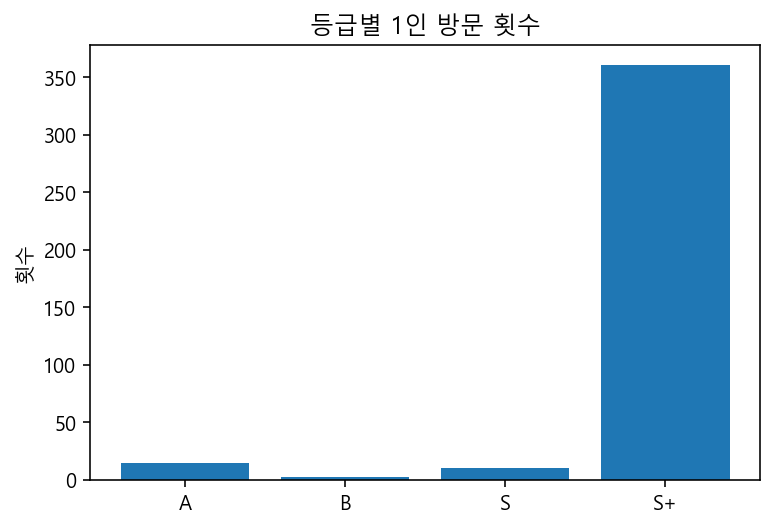

In [245]:
plt.bar(tmp3['Level'],tmp3['num']/l)
plt.ylabel("횟수")
plt.title('등급별 1인 방문 횟수')
plt.show()

**4) 등급의 지역별 분포도**

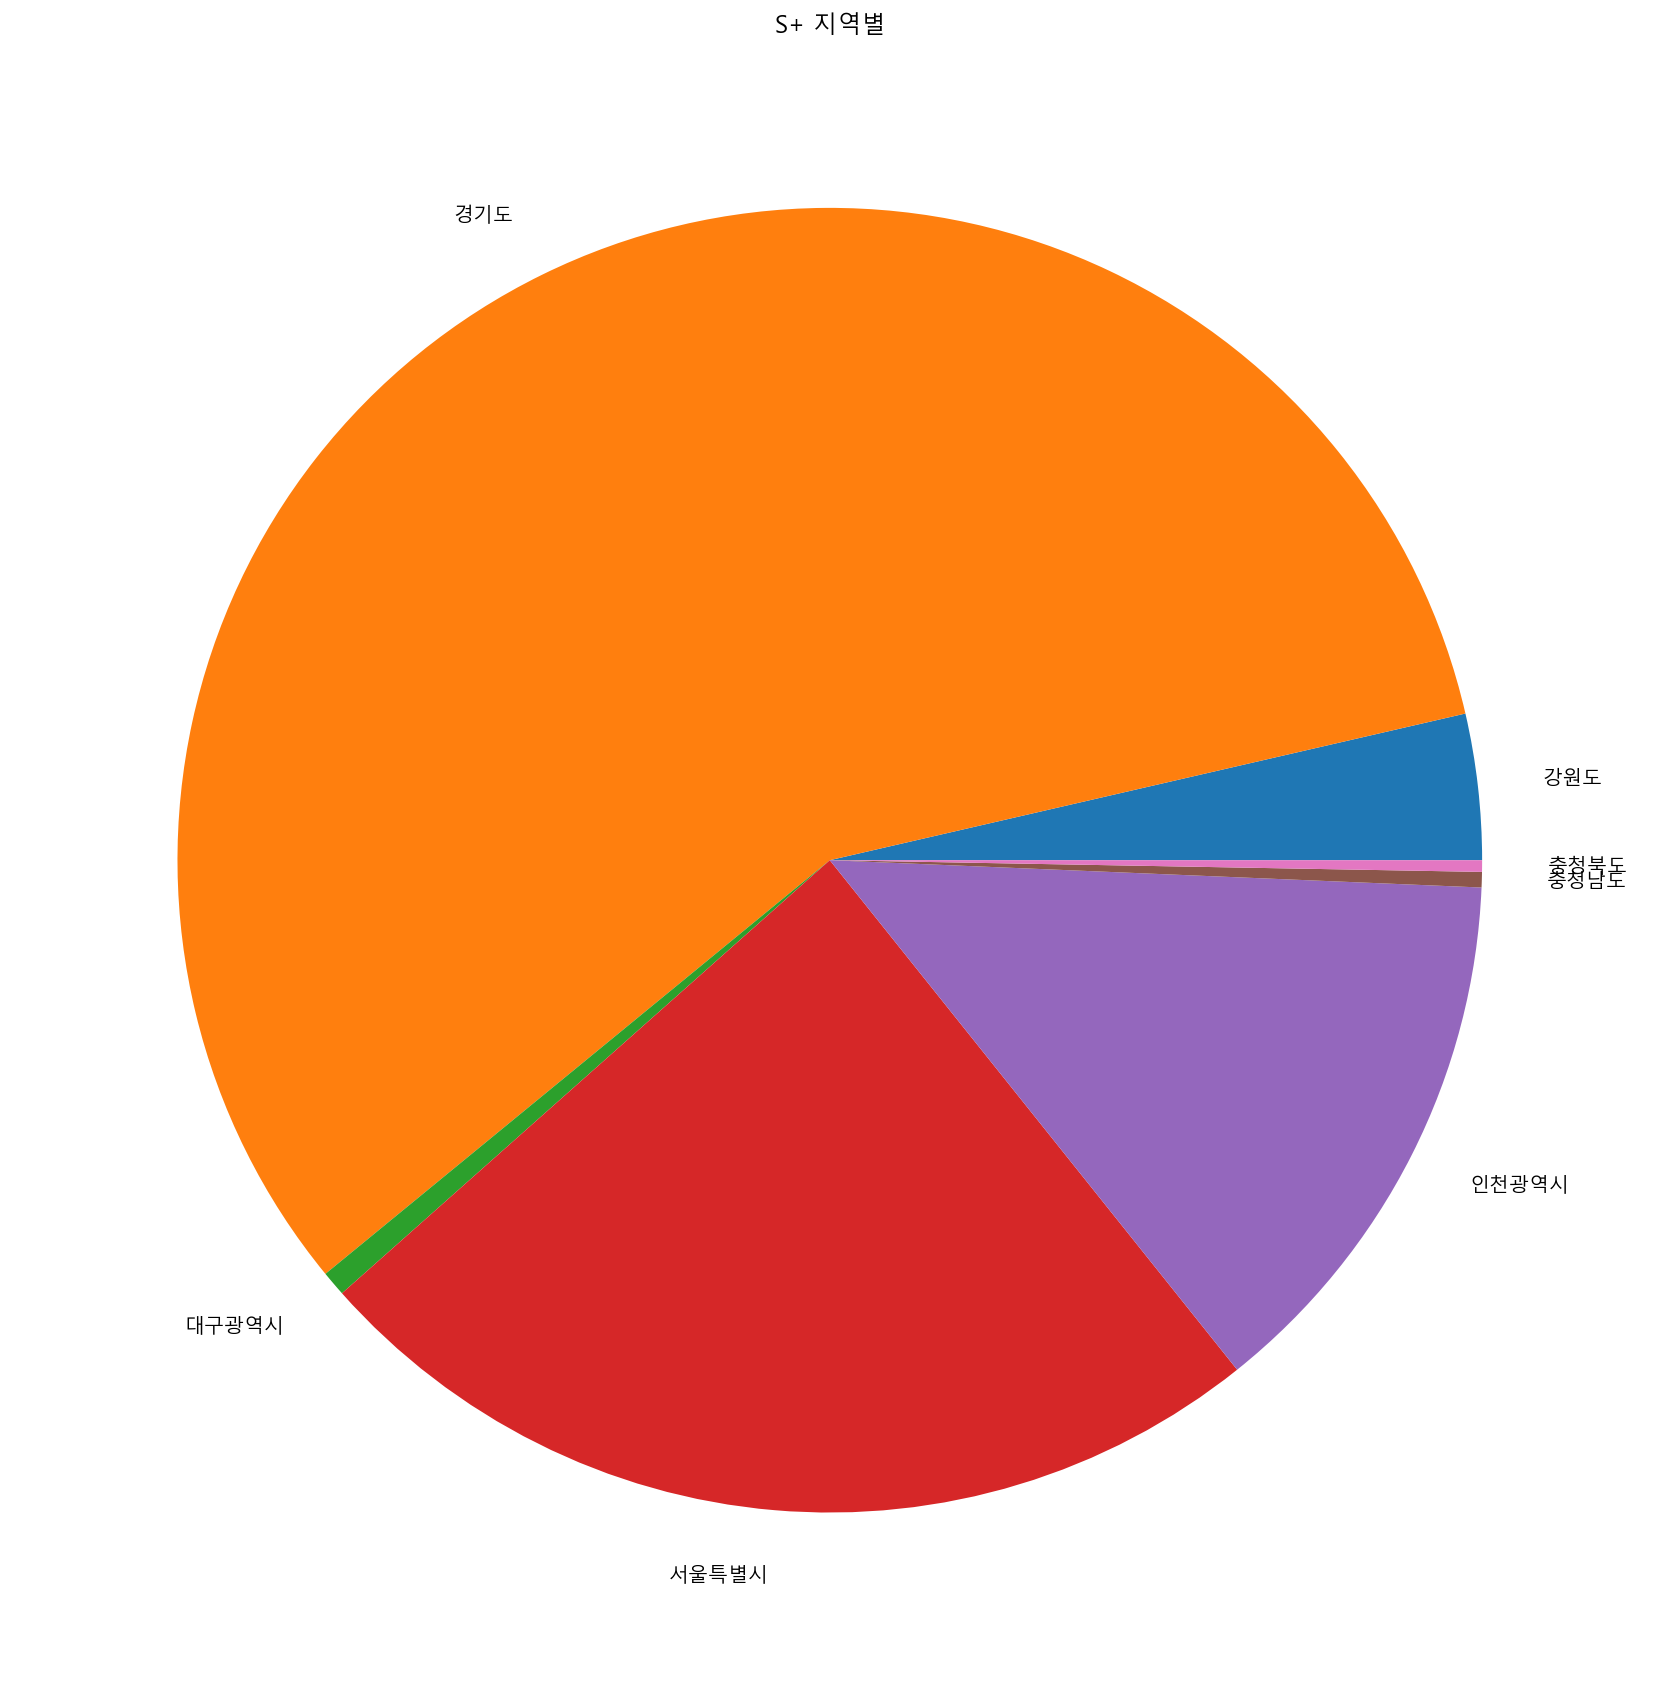

In [254]:
tmp4 = cst.groupby(by=['Level','Addr1'],as_index=False)['num'].sum()
Sp = tmp4[tmp4['Level']=='S+']
plt.figure(figsize=(30, 15))
plt.title('S+ 지역별')
plt.pie(Sp['num'],labels = Sp['Addr1'])
plt.show()
 
 

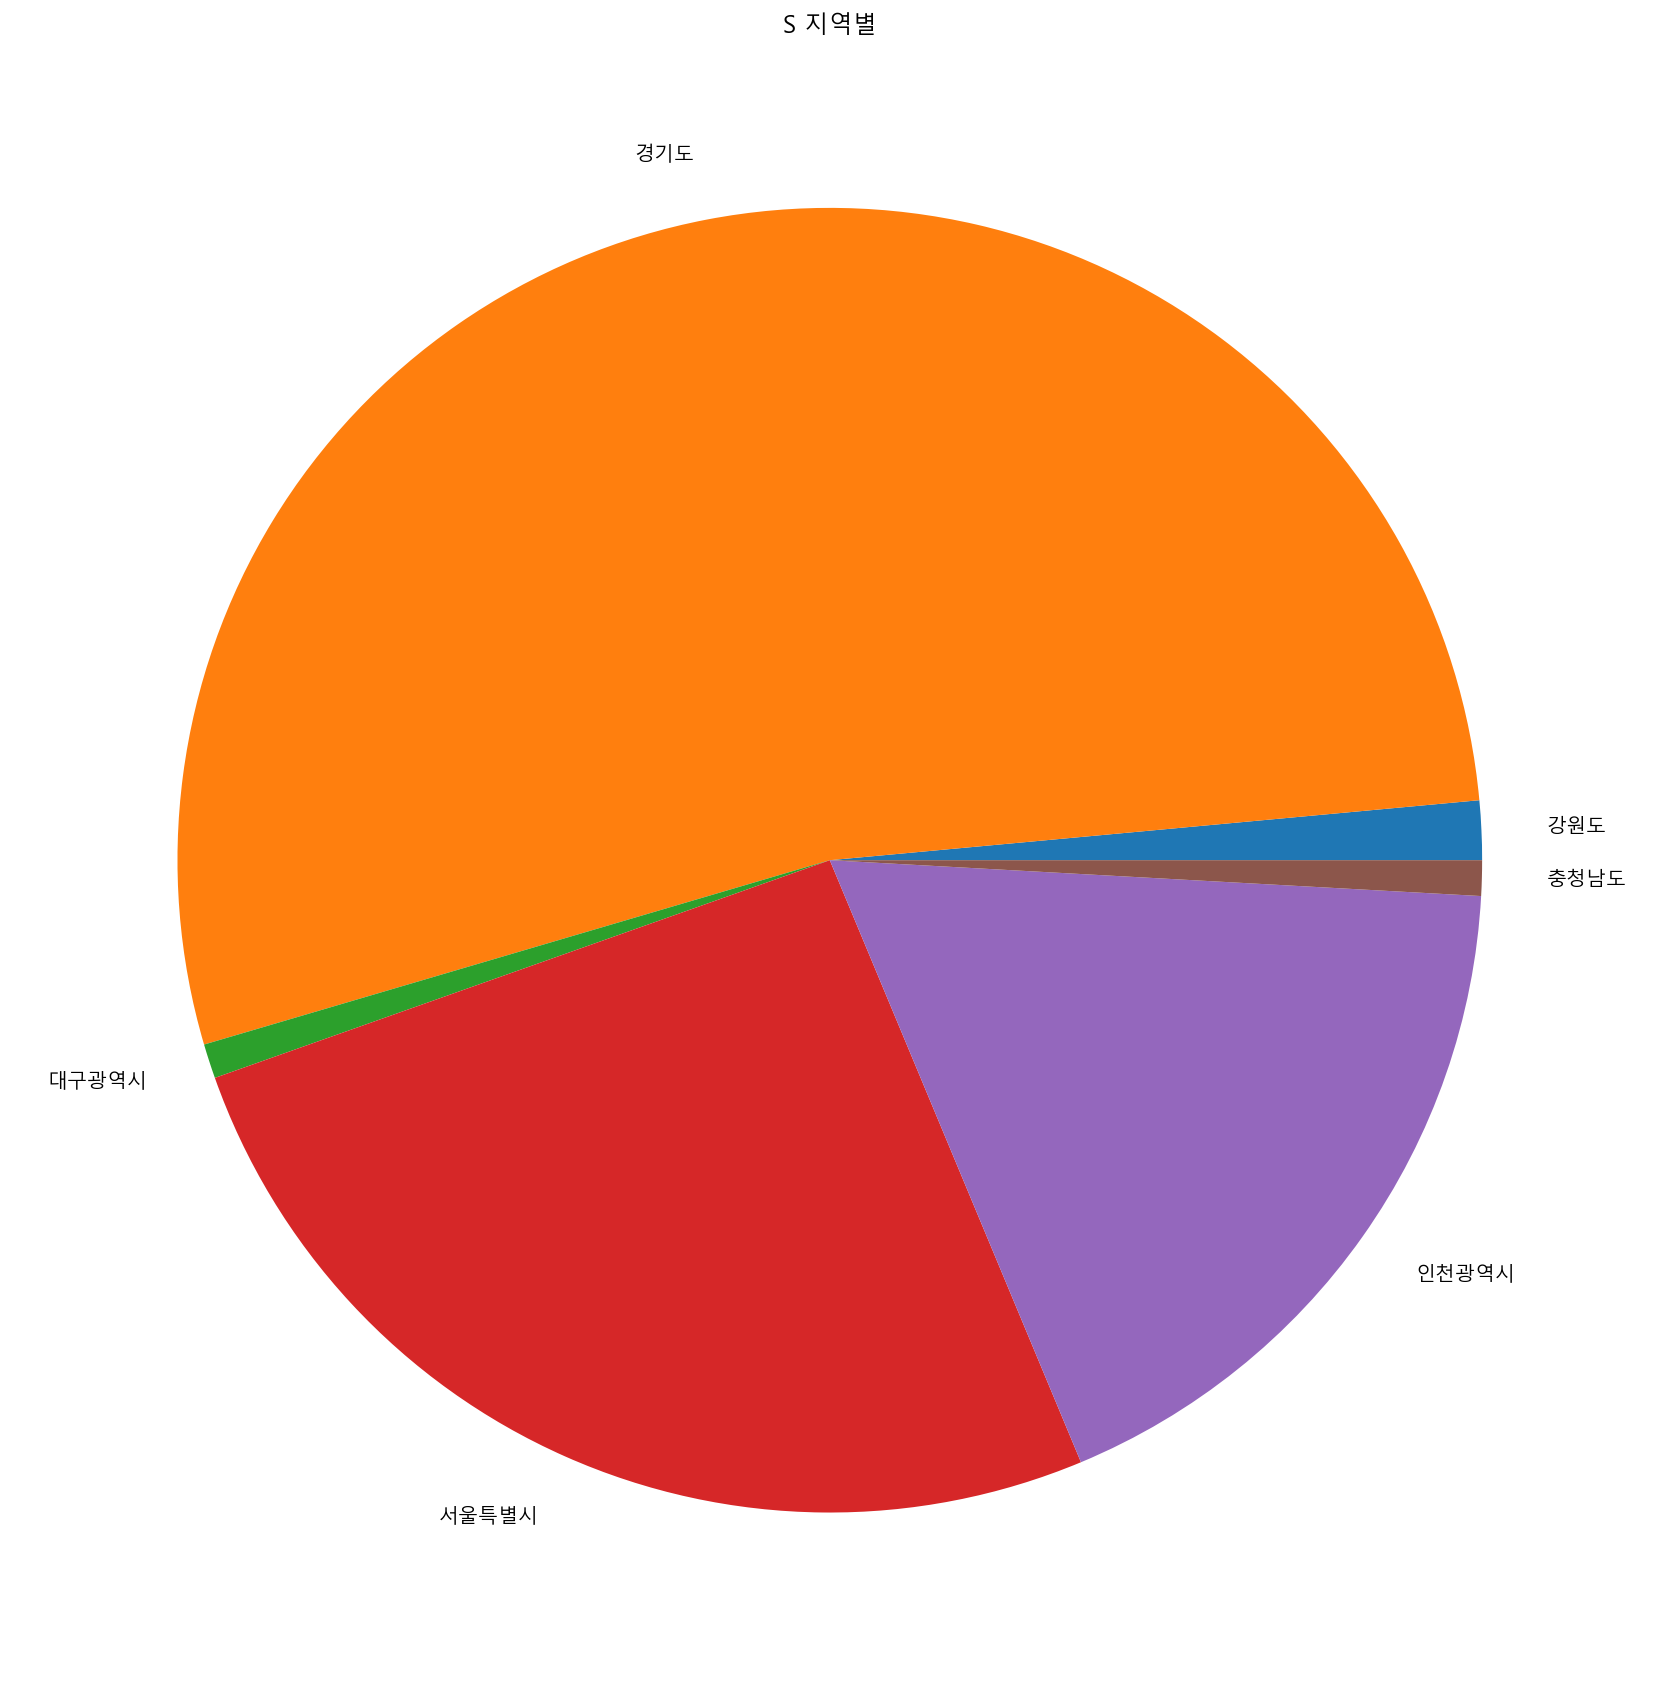

In [256]:
Sp = tmp4[tmp4['Level']=='S']
plt.figure(figsize=(30, 15))
plt.title('S 지역별')
plt.pie(Sp['num'],labels = Sp['Addr1'])
plt.show()

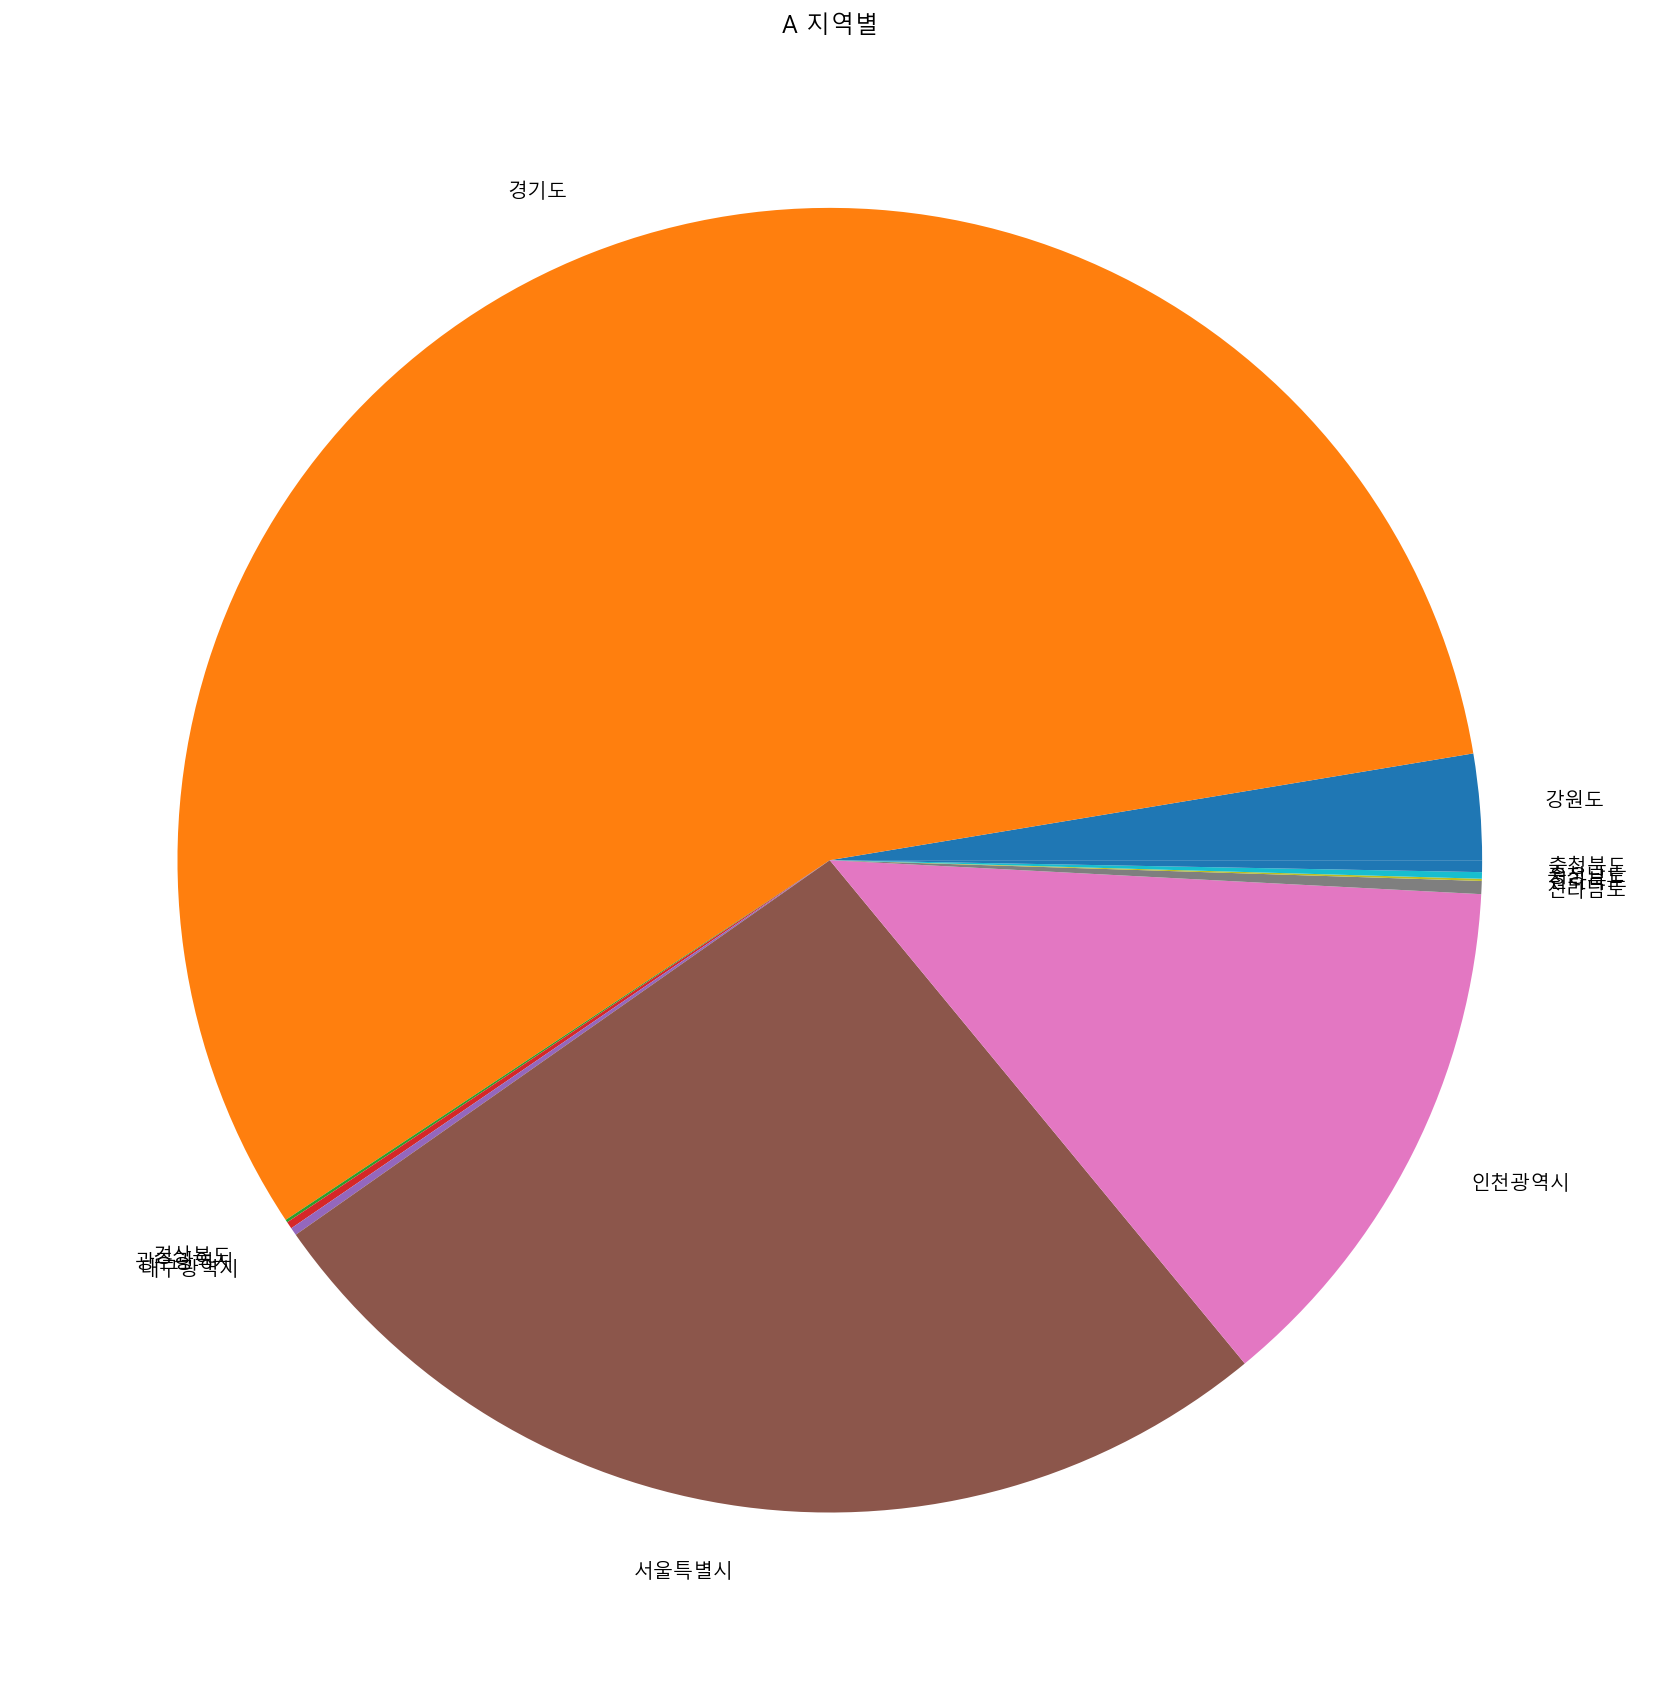

In [258]:
Sp = tmp4[tmp4['Level']=='A']
plt.figure(figsize=(30, 15))
plt.title('A 지역별')
plt.pie(Sp['num'],labels = Sp['Addr1'])
plt.show()

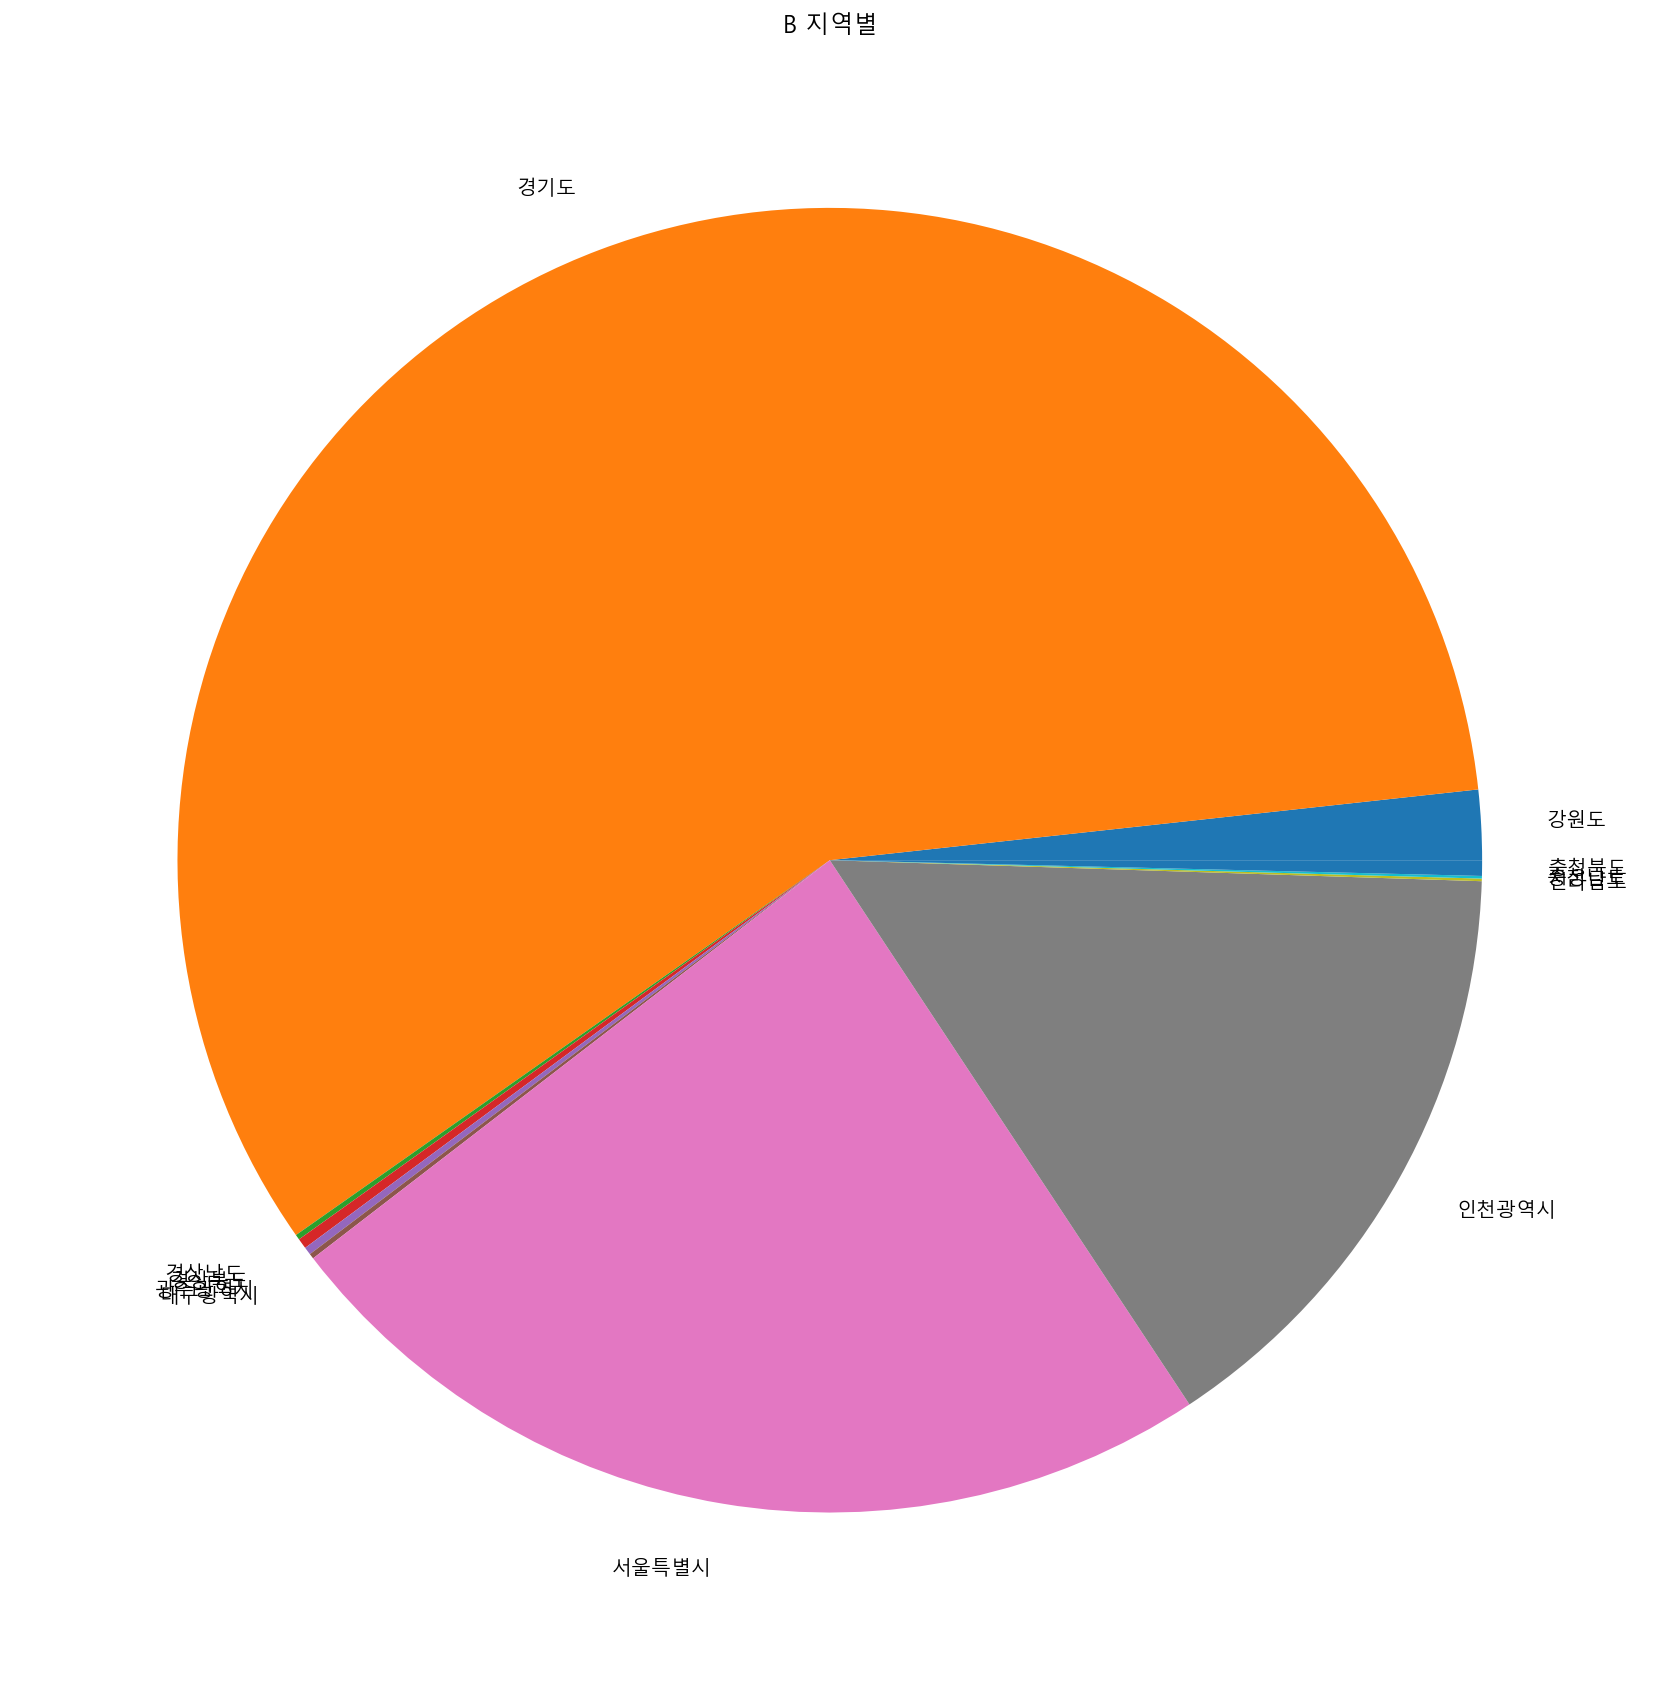

In [259]:
Sp = tmp4[tmp4['Level']=='B']
plt.figure(figsize=(30, 15))
plt.title('B 지역별')
plt.pie(Sp['num'],labels = Sp['Addr1'])
plt.show()

## 7.정리

- 분석을 통해 확인한 내용을 정리합니다.

**1) 의견**






- 경기도와 서울 인천이 대부분의 고객을 차지하고 있고 등급별도 비슷하다. 수도권을 중심으로 마케팅하면 유리할 것이다.
- 식료품이 가장 큰 비율을 차지한다.
- S+와 나머지 등급의 격차가 심하다.
- 40대와 여성의 비율이 높다.
- 

**2) 기타**

- 
- 
- 
- 
- 